In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)



https://www.kaggle.com/datasets/abhayayare/employee-data-simulation-it-industry

In [79]:
#load in the dataset and display heading 
employee = pd.read_csv("../../01_project/DATA/employee_data.csv")
employee.head()

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


In [80]:
#Establish our variables to use in the analysis 
employee_trimmed = employee[['Experience (Years)', 'Salary']].dropna()
employee_trimmed.head()

,Experience (Years),Salary
0,4,109976
1,6,120088
2,17,181301
3,7,77530
4,13,152397


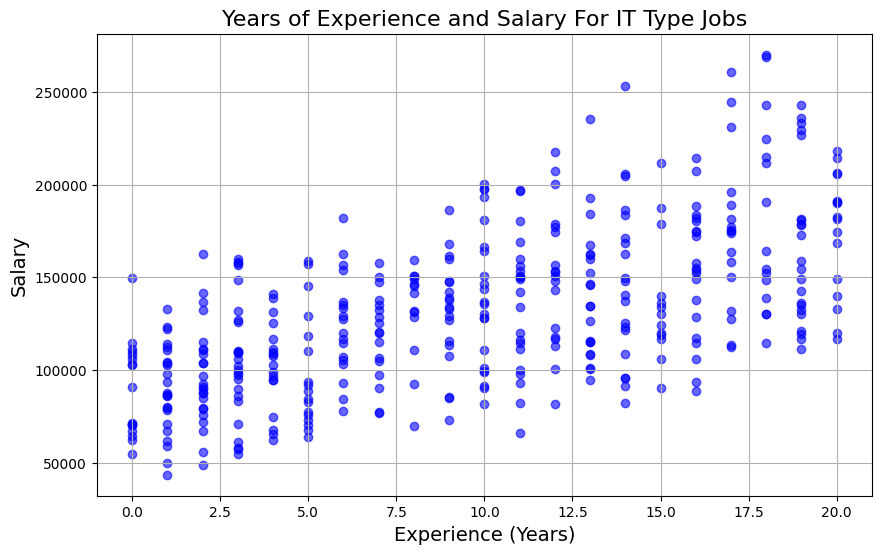

In [86]:
# Create a scatterplot to view initial relationship
plt.figure(figsize=(10, 6))
plt.scatter(employee_trimmed['Experience (Years)'], employee_trimmed['Salary'], color='blue', alpha=0.6)
plt.title('Years of Experience and Salary For IT Type Jobs', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True)
plt.show()

In [82]:
#our distirubtion of variables is extremely right skewed so we will perform a log transformation of both
employee_trimmed['salary_sqrt'] = np.sqrt(employee_trimmed['Salary']+1)
# df_trimmed_cust['credit_lmt_log'] = np.log(df_trimmed_cust['Total_Revolving_Bal']+1)

array([[<Axes: title={'center': 'Experience (Years)'}>,
        <Axes: title={'center': 'Salary'}>],
       [<Axes: title={'center': 'salary_sqrt'}>, <Axes: >]], dtype=object)

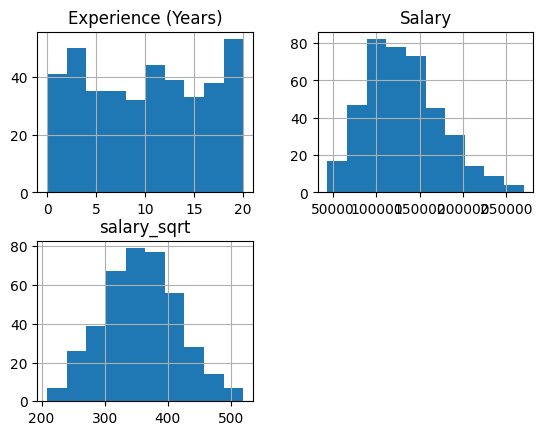

In [83]:
#display the new distributions
employee_trimmed.hist()

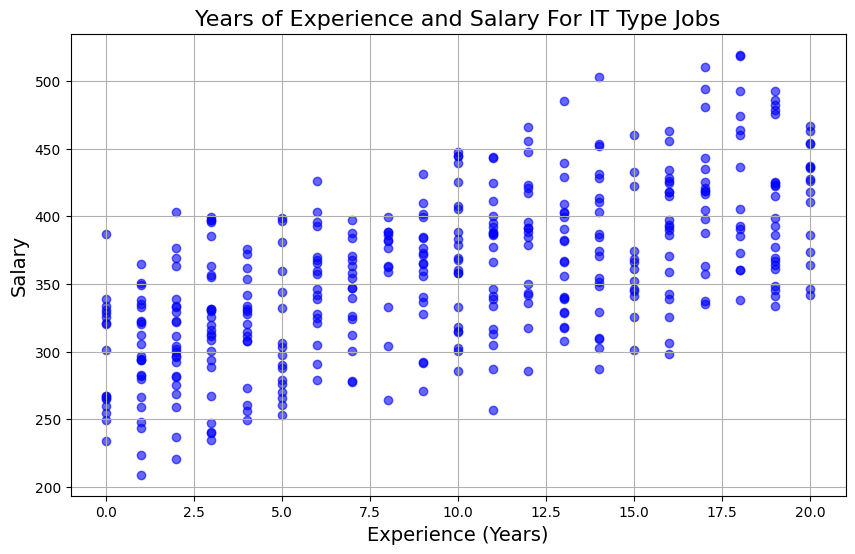

In [87]:
# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(employee_trimmed['Experience (Years)'], employee_trimmed['salary_sqrt'], color='blue', alpha=0.6)
plt.title('Years of Experience and Salary For IT Type Jobs', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=14)
plt.ylabel('Salary', fontsize=14)
plt.grid(True)
plt.show()

In [88]:
# Compute the correlation matrix
correlation_matrix = employee_trimmed.corr()
print(correlation_matrix)


                    Experience (Years)    Salary  salary_sqrt
Experience (Years)            1.000000  0.618530     0.624762
Salary                        0.618530  1.000000     0.994326
salary_sqrt                   0.624762  0.994326     1.000000
